In [31]:
import numpy as np
import scanpy as sc
import pandas as pd

In [32]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()  # print version
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.19.2 scipy==1.6.2 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 python-igraph==0.9.10 pynndescent==0.5.4


In [33]:
adult_wc_path = '../data/adult_wc_T.csv'
adult_wc = sc.read_csv(adult_wc_path)

In [34]:
# pd.DataFrame(adult_wc.X).to_csv('../results/logs1/X.csv',header=adult_wc.var_names)
# sc.pp.calculate_qc_metrics(adult_wc, percent_top=None, log1p=False, inplace=True)
# adult_wc.write_csvs('../results/logs2/qc_metrics/')

In [35]:
adult_wc.X = (adult_wc.X / np.sum(adult_wc.X, axis=1).reshape(-1, 1))
sc.pp.log1p(adult_wc)


In [36]:
sc.pp.highly_variable_genes(adult_wc,n_top_genes=2500)
adult_wc.write_csvs('../results/logs2/highly_variable_genes/')

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [37]:
adult_wc = adult_wc[:, adult_wc.var.highly_variable]
# adult_wc.write_csvs('../results/logs2/highly_variable_adult/')

In [38]:
sc.pp.scale(adult_wc)

D:\anaconda\envs\scanpy0\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [39]:
sc.tl.pca(adult_wc, svd_solver='arpack',n_comps=50)


computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:00)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE


D:\anaconda\envs\scanpy0\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:02)


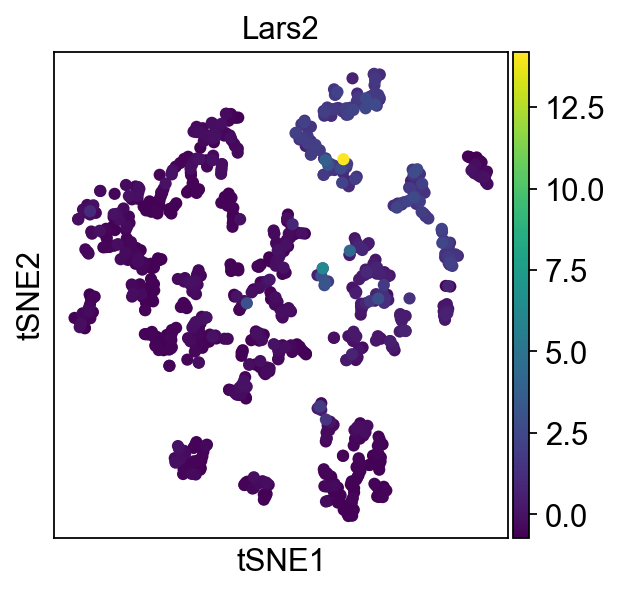

In [51]:
sc.pp.neighbors(adult_wc, n_neighbors=10, n_pcs=30)
sc.tl.tsne(adult_wc,perplexity=6)
sc.pl.tsne(adult_wc,color='Lars2')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


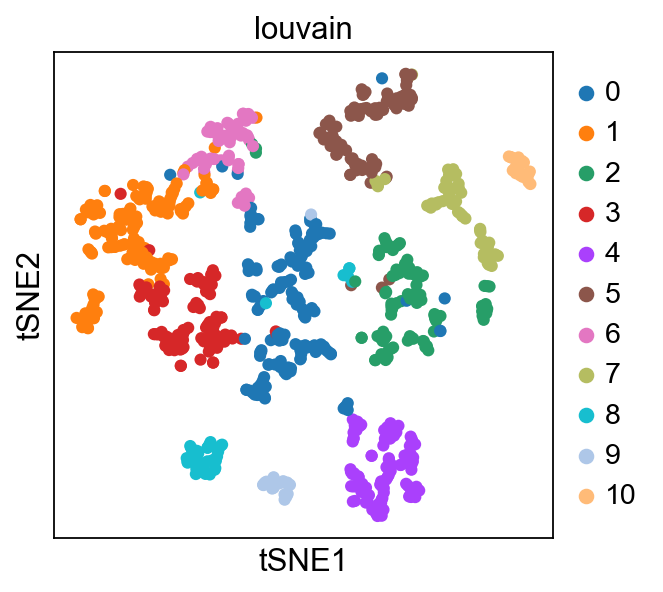

In [61]:
sc.tl.louvain(adult_wc,resolution=0.6)
sc.pl.tsne(adult_wc,color='louvain')

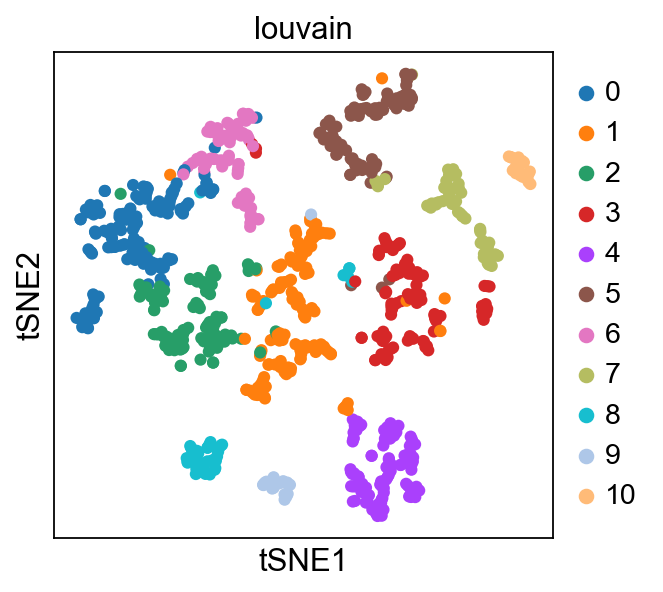